# Lab 2

## Linear regression

In [13]:
import numpy as np

import scipy.linalg as sla

import matplotlib.pyplot as plt
%matplotlib inline

### Task 1. Least Squares Method.

Download the files ``train.txt`` and ``test.txt``. The first of them contains a training sample, and the second contains a test sample. Each of the files contains two columns of numbers separated by spaces: in the first - $n$  points (the values of the $x$ argument), in the second - the values of some function $y = f(x)$ at these points, distorted by random noise. Your task is to select the function $y = g(x)$ from the training sample, which adequately approximates the dependence you do not know.

In [14]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

Dividing the values of $x$ and $y$

In [15]:
X_train = data_train[:,0:1]
Y_train = data_train[:,1:2]

# Same for the test sample

X_test = data_test[:,0:1]
Y_test = data_test[:,1:2]

**1.** Now we need to find the linear function ($y = kx + b$) that best approximates the unknown dependence using the least squares method.

In [16]:
ones = np.ones((X_train.shape[0], 1))
A = np.concatenate((X_train, ones), axis=1)
res = sla.inv(A.T @ A) @ A.T @ Y_train
print('g(x) = ', res[0][0], 'x + ', res[1][0], sep='')

g(x) = 2.2791344980519463x + 4.433230905064935


**2.** Let's visualize the points from both samples and the resulting linear function.

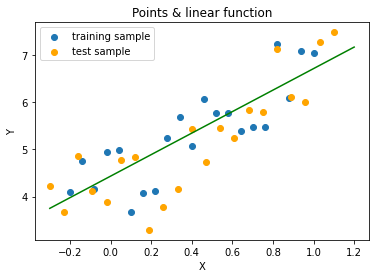

In [17]:
x = np.linspace(-0.3,1.2,2)
y = res[0] * x + res[1]

plt.scatter(X_train, Y_train, label='training sample')
plt.scatter(X_test, Y_test, color="orange", label='test sample')
plt.plot(x, y, 'g')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Points & linear function')
plt.legend()
plt.show()

**3.** Looking at the data, think about the degree of polynomial that would best approximate this function in terms of minimizing the mean square error on the training set. Find this polynomial and print it as $a_0 + a_1 x + \ldots a_k x^k$.

**Answer**: The best way to approximate this function is a polynomial of degree 20. Since there are only 21 points in the training sample, it will go through all of them and the root-mean-square error will be equal to 0.

In [18]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
matrix_A = ones
for i in range(1, 21):
    matrix_A = np.concatenate((matrix_A, X_train ** i), axis=1)

poly_21 = sla.solve(matrix_A, Y_train)

for i in range(len(poly_21)):
    if i == 0:
        print("%.3f" % poly_21[i], end="\n")
    elif i == 1:
        print("%.3f" % poly_21[i], " x", sep="", end="\n")
    else:
        print("%.3f" % poly_21[i], " x^", i, sep="", end="\n")
    if i != len(poly_21) - 1 and poly_21[i + 1] > 0:
        print("+", end='')

3.229
-0.711 x
+3245.756 x^2
-58690.971 x^3
-167702.402 x^4
+10672210.888 x^5
-75503065.391 x^6
-103151440.449 x^7
+4000381722.017 x^8
-21297510653.358 x^9
+27169880020.314 x^10
+232455828973.638 x^11
-1534108859551.927 x^12
+4912209421423.135 x^13
-10186611596857.604 x^14
+14667836084326.086 x^15
-14893047423332.953 x^16
+10508595126501.805 x^17
-4917942255839.938 x^18
+1374891541526.594 x^19
-173982412810.705 x^20


**4.** Draw it at the same plot with points from both samples.

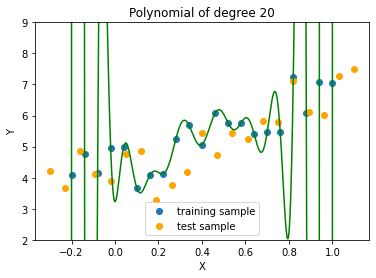

In [19]:
x = np.linspace(-0.205,1.05, 1000)
y = 0
for i in range(0, 21):
    y += poly_21[i] * (x ** i)

plt.ylim(2, 9)

plt.scatter(X_train, Y_train, label='training sample')
plt.scatter(X_test, Y_test, color="orange", label='test sample')
plt.plot(x, y, 'g')
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Polynomial of degree 20')
plt.legend()
plt.show()

**5.** For $k = 1,2,3,\ldots,10$ find the polynomial $\hat{f}_k$ of degree $k$, that gives best approximation of the unknown dependence. Print the found polynomials as $a_0 + a_1 x + \ldots a_k x^k$.

In [20]:
def PrintPolynomial(a):
    for i in range(len(a)):
        if i == 0:
            print("%.3f" % a[i], end="")
        elif i == 1:
            print("%.3f" % a[i], "x", sep="", end="")
        else:
            print("%.3f" % a[i], "x^", i, sep="", end="")
        if i != len(a) - 1 and a[i + 1] > 0:
            print("+", end='')
    print("\n")

In [21]:
polynomials = []
for k in range(2, 12):
    this = ones
    for i in range(1, k):
        this = np.concatenate((this, X_train ** i), axis=1)
    this_res = sla.inv(this.T @ this) @ this.T @ Y_train
    polynomials.append(this_res)
    
i = 1
for p in polynomials:
    PrintPolynomial(p)
    i += 1

4.433+2.279x

4.472+1.158x+1.402x^2

4.461+1.065x+1.860x^2-0.382x^3

4.341+1.172x+6.794x^2-13.051x^3+7.918x^4

4.431-0.131x+3.275x^2+21.375x^3-51.131x^4+29.525x^5

4.384-4.597x+16.003x^2+121.257x^3-481.510x^4+581.453x^5-229.970x^6

4.445-4.009x+7.215x^2+119.351x^3-314.231x^4+122.878x^5+238.699x^6-167.382x^7

4.664-5.183x-26.696x^2+268.860x^3+109.896x^4-3132.856x^5+6760.629x^6-5701.710x^7+1729.478x^8

4.646-4.553x-24.263x^2+219.042x^3+176.245x^4-2441.963x^5+3913.269x^6-1216.450x^7-1522.097x^8+903.215x^9

4.669-2.160x-36.175x^2+44.935x^3+1201.953x^4-1660.823x^5-12969.934x^6+46686.646x^7-63620.987x^8+40177.523x^9-9818.576x^10



**6.** For each of these, find the root mean square error on the training data and on the test data: $\frac1{n}\sum_{i=1}^n\left( \hat{f}_k(x_i) - y_i \right)^2$.

In [22]:
train_data = ones
for i in range(1, 21):
    train_data = np.concatenate((train_data, X_train ** i), axis=1)

test_data = ones
for i in range(1, 21):
    test_data = np.concatenate((test_data, X_test ** i), axis=1)

    
i = 1
print("degree\t training data \t \t test data")
for p in polynomials:
    MSE_train = (sla.norm(train_data[:,0:p.shape[0]] @ p - Y_train) ** 2) / 21
    MSE_test = (sla.norm(test_data[:,0:p.shape[0]] @ p - Y_test) ** 2) / 21
    print(i, "\t", MSE_train, "\t", MSE_test)
    i += 1

degree	 training data 	 	 test data
1 	 0.29689663326251964 	 0.43512020040488786
2 	 0.26969891587669137 	 0.35647628878312404
3 	 0.26949718714796095 	 0.3553464571518524
4 	 0.2610665330579274 	 0.44172701892897104
5 	 0.24998504648317563 	 0.5579732021632929
6 	 0.18829348988370193 	 2.581692932777934
7 	 0.18539621153294444 	 2.5157828948809606
8 	 0.15905556579089342 	 4.35728861435267
9 	 0.15847184274715997 	 4.776339483986281
10 	 0.15316611000301153 	 14.632478586777992


**7.** For $k = 1,2,3,4,6$ draw the plot of the obtained polynomials in one drawing together with the points $(x_i, y_i)$ from both samples.

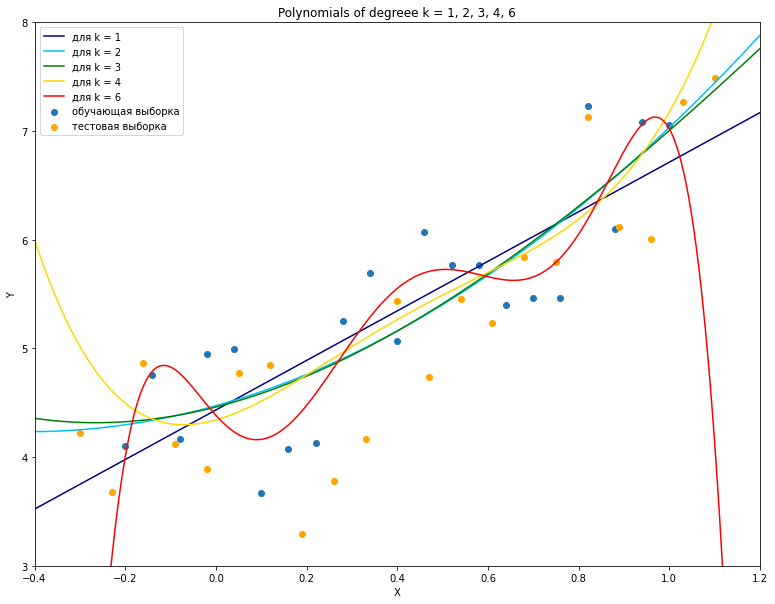

In [23]:
def DrawPolynomial (p, color, label=''):
    x = np.linspace(-0.4,1.2,1000)
    y = 0
    for i in range(p.size):
        y += p[i] * (x ** i)
    plt.plot(x, y, color, label=label)
    
    
plt.figure(figsize=(13, 10))
plt.xlim(-0.4,1.2)
plt.ylim(3, 8)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Polynomials of degreee k = 1, 2, 3, 4, 6')
plt.scatter(X_train, Y_train, label='обучающая выборка')
plt.scatter(X_test, Y_test, color="orange", label='тестовая выборка')
DrawPolynomial(polynomials[0], "navy", label='для k = 1')
DrawPolynomial(polynomials[1], "deepskyblue", label='для k = 2')
DrawPolynomial(polynomials[2], "green", label='для k = 3')
DrawPolynomial(polynomials[3], "gold", label='для k = 4')
DrawPolynomial(polynomials[5], "red", label='для k = 6')
plt.legend()
plt.show()

**8.** What happens  when the degree of the polynomial grows? It would seem that the larger the degree, the more complex the polynomial will be and the better it will approximate our function. Do your observations confirm this? What do you think explains the behavior of the error on test data when $k = 10$? What is the name of the effect you observe?

As the degree of the polynomial grows, the error on the training data decreases, and on the test data, it grows.

With an increase in the degree, the function begins to better recognize examples from the training sample and instead of finding a pattern that the entire data array satisfies, it "adjusts" to random, "noise" values ​​from the training sample.

The behavior of the error on the test data at $ k = 10 $, in addition to the effect described above, is explained by the fact that the training data are distributed in the range $[- 0.2, 1]$, and the test data on the range $[- 0.3, 1.1]$. The polynomial at the ends adapted to the training sample goes down sharply (in this case), so the squared error is very large at the extreme values of the test data.

This effect is called overfitting.

### Task 2. Linear regression

Download ``flats_moscow_mod.txt`` and ``flats_moscow_description.txt`` files. The first of them contains data on apartments in Moscow. Each line contains six characteristics of a certain apartment, separated by tabs; the first line contains the code names of the characteristics. The second file contains brief descriptions of the features.

**0.** Divide the sample into training and test. It is better to do this in a random way (after all, you do not know how the creators of the dataset ordered the objects).

In [24]:
from sklearn.model_selection import train_test_split

data_flats = np.loadtxt('flats_moscow_mod.txt', delimiter='\t', skiprows=1)

X_flats = data_flats[:,1:]
Y_flats = data_flats[:,0:1]

X_trainf, X_testf, Y_trainf, Y_testf = train_test_split(X_flats, Y_flats, test_size=0.3, random_state=42)

**1.** Your task will be to build a (linear) relationship between the price of an apartment and the rest of the available parameters using the least squares method. Find the regression coefficients using the formulas you know. Write out the constructed model.

In [25]:
A = np.concatenate((X_trainf, np.ones((X_trainf.shape[0], 1))), axis=1)
res = sla.inv(A.T @ A) @ A.T @ Y_trainf

print("price =", "%.3f" % res[0][0], "* totsp +",
      "%.3f" % res[1][0], "* livesp +",
      "%.3f" % res[2][0], "* kitsp",
      "%.3f" % res[3][0], "* dist",
      "%.3f" % res[4][0], "* metrdist",
      "%.3f" % res[5][0], sep =" ")

price = 1.595 * totsp + 1.060 * livesp + 2.069 * kitsp -3.412 * dist -1.386 * metrdist -8.101


**2.** Which parameters are positive and which are negative? Do they agree with your ideas about life?

Area, living area and kitchen area have a positive sign. The higher these parameters, the higher the price.
Distances from the center and from the metro are negative. The higher these parameters, the lower the price.

So the large apartment is expensive, an apartment in the center near the metro is expensive :(

**3.** Estimate the quality of the approximation by calculating the root mean square error on the test sample.

In [26]:
A_testf = np.concatenate((X_testf, np.ones((X_testf.shape[0], 1))), axis=1)
MSE_testf = (sla.norm(A_testf @ res - Y_testf) ** 2) / X_testf.shape[0]
print(MSE_testf)


1226.7814210409827


### Complicating the model

Of course, no one guarantees that the variable being explained (the price of an apartment) depends on the other characteristics exactly linearly. The relationship can be, for example, quadratic or logarithmic; moreover, not only individual signs can be important, but also their combinations. This can be taken into account by adding, as additional features, different functions of the existing characteristics: their squares, logarithms, pairwise products.

In this task you need to try to improve the quality of the model by adding additional features that are functions from the existing ones. But be careful: over-complicating the model will lead to overfitting.

**4.** Describe the attributes that you decided to add. Explain what motivated the choice of these particular features.

The feature is $(\dfrac{livesp}{10})^2$

This feature was chosen on the basis of the following assumption: starting from a certain moment, the price of additional square meters in an apartment grows with an increase in living space. This can be explained by the fact that buyers of relatively large apartments are either large families or people with a high level of income. These two categories cannot agree to apartments with a smaller area and are ready to pay extra for additional space, which is known to the seller (and he may deliberately raise prices). It can also be assumed that there are few large apartments for sale and the demand for them significantly exceeds the supply.


**5.** Plot the (linear) relationship between the price of an apartment and new features using the least squares method. Find the regression coefficients using the formulas you know. Write out the constructed model.

In [27]:
other1 = (A[:,1:2] / 10) ** 2
A_new = np.concatenate((A, other1), axis=1)
res_new = sla.inv(A_new.T @ A_new) @ A_new.T @ Y_trainf

print("price =", "%.3f" % res_new[0][0], "* totsp",
      "%.3f" % res_new[1][0], "*livesp +",
      "%.3f" % res_new[6][0], "*(livesp/10)^2 +",
      "%.3f" % res_new[2][0], "* kitsp",
      "%.3f" % res_new[3][0], "* dist",
      "%.3f" % res_new[4][0], "* metrdist +",
      "%.3f" % res_new[5][0], sep =" ")

price = 1.494 * totsp -5.663 *livesp + 6.661 *(livesp/10)^2 + 2.346 * kitsp -3.416 * dist -1.224 * metrdist + 160.131


**6.** Estimate the quality of the approximation by calculating the root mean square error on the test sample.

In [28]:
other_t = (A_testf[:,1:2] / 10) ** 2
A_ntestf = np.concatenate((A_testf, other_t), axis=1)
MSE_test = (sla.norm(A_ntestf @ res_new - Y_testf) ** 2) / X_testf.shape[0]
print("Error on the test sample:", MSE_test)

Error on the test sample: 934.0008798463355


### Task 3. Regularization

**1.** Why is it not right to choose the regularization coefficient based on the training sample? On the test sample?

It is not right to choose the regularization coefficient based on the training sample, because if you do so, the optimal hyperparameter will be as close to 0 as possible. For example, we want to "smooth" a polynomial of a high degree, but then it will obviously have a larger standard deviation on the sample used to build the model.

the test sample exists to assess the correctness of the constructed model. If we select the value of $\lambda$ based on it, the model will not be completely independent from the test sample, which means that there will be nothing to check the correctness of its operation.

**2.** Now let's remember the first task. If you did it, then remember that the error of approximation by a polynomial of the sixth degree is quite high. Let's try to use regularization when building a model. Divide the training set from the first task into two parts, one of which is declared as training and the other as one for validation

In [30]:
data_train = np.loadtxt('train.txt', delimiter=',')
data_test = np.loadtxt('test.txt', delimiter=',')

X = data_train[:,0:1]
Y = data_train[:,1:2]
X_train, X_validate, Y_train, Y_validate = train_test_split(X, Y, test_size=0.3, random_state=123)

X_test = data_test[:,0:1]
Y_test = data_test[:,1:2]

**3.** Make sure that, using regularization with a well-chosen coefficient $\lambda$, you can make no more error on the test sample than for a polynomial of optimal degree in a model without regularization.

In [31]:
A_train = np.ones((X_train.shape[0], 1))
E = np.eye(7)
for i in range(1, 7):
    A_train = np.concatenate((A_train, X_train ** i), axis=1)
    
A_validate = np.ones((X_validate.shape[0], 1))
for i in range(1, 7):
    A_validate = np.concatenate((A_validate, X_validate ** i), axis=1)

    
l_min = 100
MSE_min = 100
res_min = 0

for i in range(-200, 80):
    l = 2 ** (i / 20)
    this_res = sla.inv(A_train.T @ A_train + l * E) @ A_train.T @ Y_train
    MSE = (sla.norm(A_validate @ this_res - Y_validate) ** 2) / X_validate.shape[0]
    if MSE < MSE_min:
        lmin = l
        MSE_min = MSE
        res_min = this_res
print("Regularization coefficient:", lmin)

A_test = np.ones((X_test.shape[0], 1))
for i in range(1, 7):
    A_test = np.concatenate((A_test, X_test ** i), axis=1)

MSE_test = (sla.norm(A_test @ res_min - Y_test) ** 2) / X_test.shape[0]
print("Standard deviation:", MSE_test)


Regularization coefficient: 0.7320428479728127
Standard deviation: 0.3412839169184921


**4.** For chosen $\lambda$ compare $\det(X^TX)$ and $\det(X^TX + \lambda E)$. How can you explain that?

In [32]:
print('det(X^t X):\t\t', sla.det(A_train.T @ A_train))
print('det(X^t X + l * E):\t', sla.det(A_train.T @ A_train + lmin * E))

det(X^t X):		 5.612411461398901e-13
det(X^t X + l * E):	 57.19290937711208


$\det(X^TX)$ is close to 0, since the matrix $X^TX$ is close to degenerate - such parameters of the model as area and living area are almost linearly dependent.

$\det(X^TX + \lambda E)$ much more, since we "corrected" the matrix and selected such a hyperparameter, at which the effect of overfitting is less and the solution is more stable.

**5.** Visualize both of the sixth degree polynomials approximating the unknown function for the model with and without regularization.

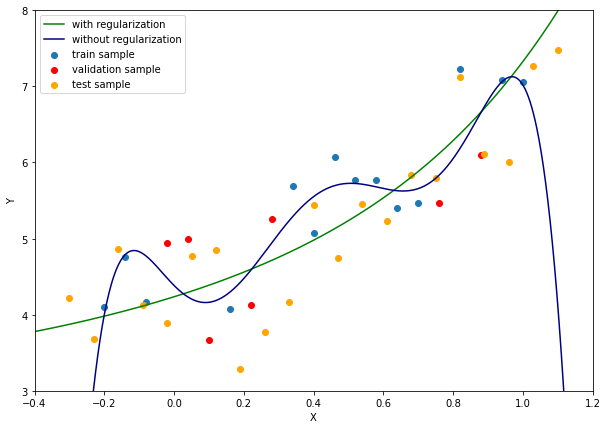

In [33]:
plt.figure(figsize=(10, 7))
plt.xlim(-0.4,1.2)
plt.ylim(3, 8)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('')
plt.scatter(X_train, Y_train, label='train sample')
plt.scatter(X_validate, Y_validate, color='red', label='validation sample')
plt.scatter(X_test, Y_test, color="orange", label='test sample')
DrawPolynomial(res_min, "green", label='with regularization')
DrawPolynomial(polynomials[5], "navy", label='without regularization')
plt.legend()
plt.show()

**6.** How does the first of them compare favorably with the second?

The polynomial plot for the regularized model is smoother and has less fluctuation due to the choice of points in the test sample. It better recognizes the global, general pattern, which is especially noticeable at the ends of the segment under consideration (where there are no points from the training sample, but from the test sample).